In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("finalProject.ipynb")

# Final Project: Regression Inference & Classification

Welcome to the Final Project for Data Science for All!  This is the final project for our course and with this project you will get to explore a dataset of your choice. By the end of the project, you will have some experience with:

1. Finding a dataset of interest.
2. Performing some exploratory analysis using linear regression and inference.
3. Building a k-nearest-neighbors classifier.
4. Testing a classifier on data.

### Logistics

**Rules.** Don't share your code with anybody. You are welcome to discuss your project with other students, but don't share your project details or copy a project from the internet. This project should be YOUR OWN (code, etc.). If you do base your project on something you learned online or through a generative AI tool such as ChatGPT, make sure to check with your instructor before getting started and reference your sources as part of this project. The experience of solving the problems in this project will prepare you for the final exam (and life). During the final lab session, you will have a chance to share with the whole class.

**Support.** You are not alone! Come to lab hours, tutoring hours, office hours, and talk to your classmates. If you're ever feeling overwhelmed or don't know how to make progress, we are here to help! Don't hesitate to send an email. 

**Advice.** Develop your project incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. Don't hesitate to add more names/variables or functions if this helps with your analysis or classifier development. Also, please be sure to not re-assign variables throughout the notebook! For example, if you use max_temperature in your answer to one question, do not reassign it later on.

To get started, load `datascience`, `numpy`, and `plots`.

**Reading**: 

* [Inference for Regression](https://www.inferentialthinking.com/chapters/16/Inference_for_Regression.html)

* [Classification](https://www.inferentialthinking.com/chapters/17/Classification.html)

In [2]:
# Don't change this cell; just run it. If you need additional libraries for your project, you can add them to this cell.

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import math


# 1. Picking a Dataset

In this project, you are exploring a dataset of your choice. 
The dataset should be large enough: multiple individuals (rows) with multiple attributes (columns) such that we can try to make a prediction based on the known information in this dataset using linear regression and/or classification.
In this first section you will:
- find a data set that you are interested in
- record the source of where you found it
- save it as a .csv file in the same folder as your jupyter notebook.
- make sure you can read it in as a table and that your dataset represents a large enough sample for investigating the possible use of regression inference and clasification
- Explore the data using visualization techniques learned in this course
- Formulate what (which attributes) you would like to investigate using a linear regression model
- Formulate what question you would like to answer with a classifier based on this dataset. For example: (1) Is this movie a thriller or a comedy? (2) Is this amazon order Fraudulant or not? (3) Does this patient have cancer or not? See section in the book for more details on [Classification](https://www.inferentialthinking.com/chapters/17/Classification.html) 
- Discuss your choice with you instructor and get approval to get started with section 2

*Note 1: If you need guidance on where and how to find a dataset, ask your instructor for help!*

*Note 2: Your final project conclusion does not necessarily need to show that you have a good regression model or classifier to make predictions! What is important is your own analysis of its potential and limitations when investigating the dataset for making predictions using these techniques*



**Question 1.1** In the cell below:
1. Read in the dataset you chose as a table
2. Edit the comment to describe where you found this dataset

In [3]:
# Edit this comment to describe where you found this dataset
# Load your dataset into a table

my_data_raw = Table.read_table('air_quality.csv')
my_data_raw

date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
2024-08-31 23:00,Hukou,Hsinchu County,62,PM2.5,Moderate,0.9,0.17,35,40.2,18,17,2.3,2.6,0.3,2.3,225,nan,0.2,20.1,26,1,121.039,24.9001,22
2024-08-31 23:00,Zhongming,Taichung City,50,nan,Good,1.6,0.32,27.9,35.1,27,14,7.6,9.3,1.6,1.1,184,nan,0.2,15.3,23,1,120.641,24.152,31
2024-08-31 23:00,Zhudong,Hsinchu County,45,nan,Good,0.4,0.17,25.1,40.6,21,13,2.9,4.1,1.1,0.4,210,nan,0.2,13.8,24,0,121.089,24.7409,23
2024-08-31 23:00,Hsinchu,Hsinchu City,42,nan,Good,0.8,0.2,30,35.9,19,10,4,4.8,0.7,1.9,239,nan,0.2,13,26,1,120.972,24.8056,24
2024-08-31 23:00,Toufen,Miaoli County,50,nan,Good,1,0.16,33.5,35.9,18,14,1.8,3.1,1.2,1.8,259,nan,0.1,15.3,28,1,120.899,24.6969,25
2024-08-31 23:00,Miaoli,Miaoli County,40,nan,Good,1.1,0.17,35.2,35,15,12,4,5.1,1.1,1.4,235,nan,0.1,12.2,17,1,120.82,24.565,26
2024-08-31 23:00,Sanyi,Miaoli County,39,nan,Good,0.9,0.18,35.3,42.9,14,9,2.4,3.1,0.7,0.6,203,nan,0.1,11.4,16,0,120.76,24.3825,27
2024-08-31 23:00,Fengyuan,Taichung City,44,nan,Good,1.3,0.24,24.6,39.7,21,12,6.8,7.3,0.5,1.2,38,nan,0.2,13.5,21,1,120.743,24.257,28
2024-08-31 23:00,Shalu,Taichung City,46,nan,Good,2.5,0.2,30.3,40.4,33,16,7.3,7.7,0.3,0.5,8,nan,0.1,14.2,26,1,120.569,24.2256,29
2024-08-31 23:00,Dali,Taichung City,49,nan,Good,0.7,0.24,29.4,37,20,12,5.6,6.3,0.7,0.9,97,nan,0.2,15.1,21,0,120.678,24.0996,30


In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2:** In the following cell, describe each of the variables in the dataset.  Are they categorical or numerical? How many observations are there?  Add a code cell below this to show how you found the correct number of observations programmatically.


The dataset has different types of variables, with some being categorical and others numerical. 

Categorical Variables:
- date: When the data was recorded.
- sitename: The name of the site.
- county: The county of the site.
- pollutant: Main pollutant at the site.
- status: Air quality label like Good or Moderate.
- unit: The measurement unit.


Numerical Variables:
- aqi: Overall air qualitty score.
- so2: Amount of sulfur dioxide.
- co: Amount of carbon monoxide.
- o3: Amount of ozone.
- o3_8hr: 8 hour average ozone.
- pm10: Particles smaller than 10 micrometers.
- pm2.5: Particles smaller than 2.5 micrometers.
- no2: Amount of nitrogen dioxide.
- nox: Amount of nitrogen oxides.
- no:Amount of nitric oxide.
- windspeed: Speed of wind.
- winddirec: Direction of wind.
- co_8hr: 8 hour average carbon monoxide.
- pm2.5_avg: Average of PM2.5 over time.
- pm10_avg: Average of PM10 over time.
- so2_avg: Average of sulfur dioxide over time.
- longitude: Site’s longitude.
- latitude: Sites latitude.
- siteid: Site ID number.

There are 174732 observations. SPECIFY EVERYTHING. Break it into two groups categorical and numerical and list descriptions. 

In [5]:
observations_num = my_data_raw.num_rows
observations_num

174732

<!-- END QUESTION -->

**Question 1.3:** The dependent or response variable of interest is the variable that we will try to classify later in this project.  This is the variable that should have two levels that will be used in classification later.  

For example: (1) Is this movie a thriller or a comedy? (2) Is this amazon order Fraudulent or not? (3) Does this patient have cancer or not? See section in the book for more details on [Classification](https://www.inferentialthinking.com/chapters/17/Classification.html).  

In the code cell below, make any necessary adjustments to your data so that the variable is formatted in this way.  Then assign the variable `var` to the column `label` of your table that contains the observations of this variable (note: the label should be a string, so don't forget the quotes!)


In [6]:
# If you need to make adjustments to your data so that the variable is formatted in 2 levels add the needed code below, before setting var
my_data_raw = my_data_raw.with_column("Aqi Good", my_data_raw.column("status") == "Good")
var = ("Aqi Good")
var


'Aqi Good'

In [7]:
grader.check("q1_3")

q1_3 results: All test cases passed!

Now, we are ready to investigate our data visually!

**Question 1.4:** Think about the numerical variables in the dataset that might be related to each other.  In the cell below, make three different scatter plots that show the relationship between different variables while also displaying how each case is classified.  

Use the following line of code:

**my_data.scatter(`Column 1`, `Column 2`, group=`label`)**

Replace `Column 1` and `Column 2` with the correct column names of numerical variables(features) you would like to investigate. Replace `label` with the column name of the categorical variable you would like to try to classsify.

Note: The commented code in the cell below is sample code for this.

<!-- BEGIN QUESTION -->



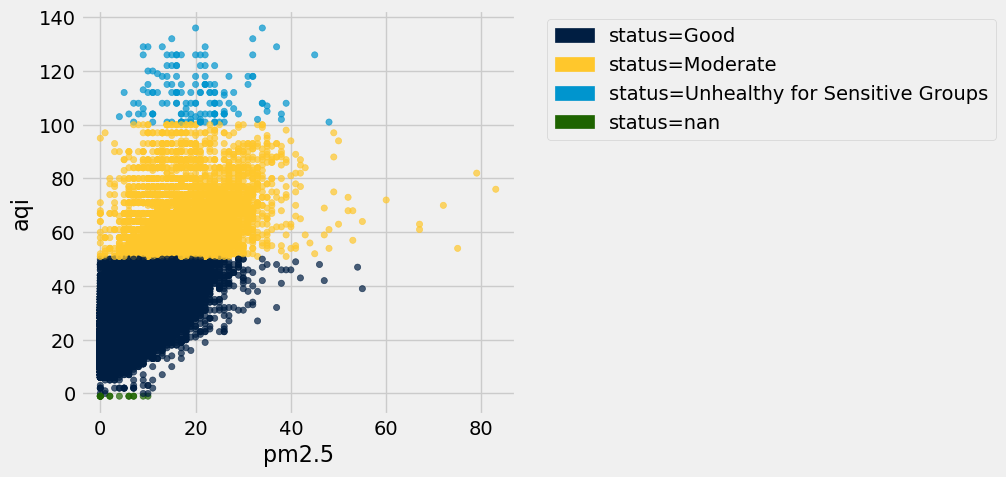

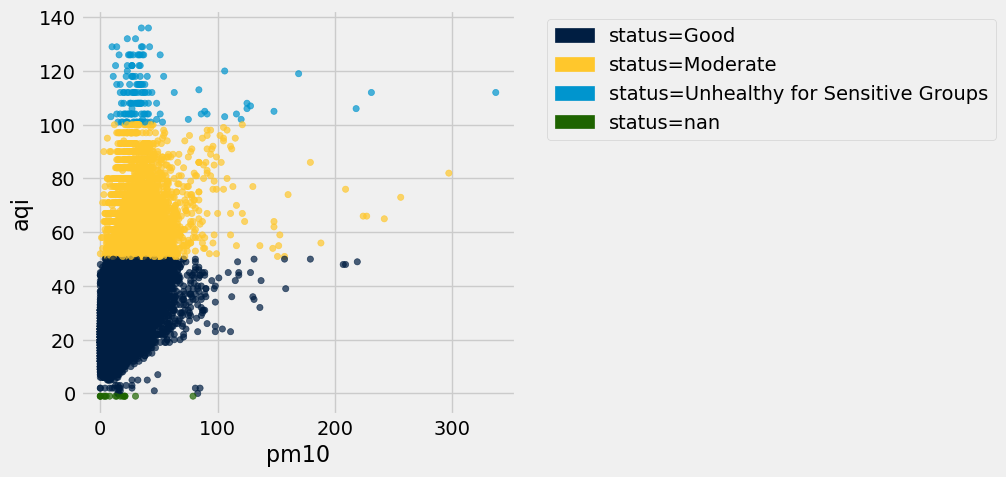

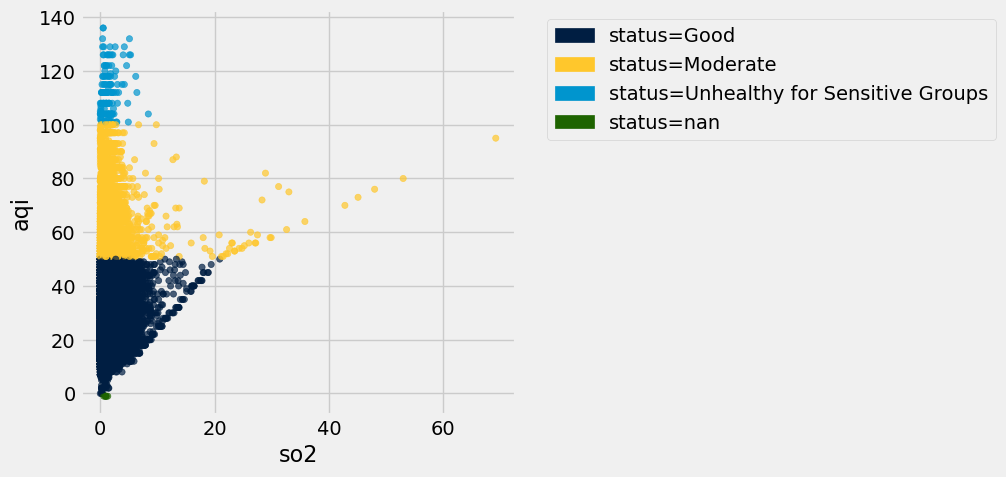

In [8]:
# Here is the code placeholder to use, uncomment the line and adjust according to the names if the columns in your dataset:
# my_data.scatter("Column 1", "Column 2", group="label")

# Particle matter 2.5 
my_data_raw.scatter("pm2.5", "aqi", group="status")
# Particle matter 10
my_data_raw.scatter("pm10", "aqi", group="status")
# sulfur dioxide
my_data_raw.scatter("so2", "aqi", group="status")


<!-- END QUESTION -->

**Question 1.5** Describe the three plots from the last question.  For each plot, note whether the relationship appears to be linear and whether it is a positive or negative association.  Which of the three plots will you look at for linear regression?



For plot 1 it shows a linear relationshop and a positive association where higher levels of pm2.5 result in higher AQI values. For plot 2 it shows a linear relationship(although less linear than first plot) and a positive relationship with higher pm10 values resulting in higher AQI values. The third plot is non-linear since data points are more scattered and a positve association where so2 levels result in higher AQI values. The plot I will look at for linear regression is the first plot since it shows the most clearest and most linear relationship among the three. 

<!-- END QUESTION -->

**Question 1.6** In the cell below, formulate the question you would like to try to answer with a classifier that you plan to build.

Can I accurately predict the air quality status(Good or Bad) based on the other variables pm2.5, pm10, so2, and aqi?

# NOTE: at end of part 2 go over how plots not muh of linear re

<!-- END QUESTION -->

**Question 1.7** Set the variable **instructor_signed_off** to 'YES' if you have checked in with your instructor during lab hours.

In [9]:
instructor_signed_off = 'YES'

In [10]:
grader.check("q1_7")

q1_7 results: All test cases passed!

# 2. Regression Inference

To get started, reduce the table with relevant data that you would like to use to evaluate a linear regression model to make a prediction. In this section, you will evaluate this model and set up a hypothesis test to check if there is true correlation/linear association. You will analyze residuals, confidence interval and prediction lines of best fit.

**Question 2.1** Copy the cell where you loaded the dataset in section 1, reduce the table to only include the relevant data for what you would like to use in your regression model. The table should only have 2 columns of intest since this is simple linear regression.

In [11]:
# Copy the cell where you loaded the dataset in section 1 and reduce the table to only include the relevant data for linear regression
# You may have to clean your data to get rid of outliers

my_data = my_data_raw.select("pm2.5", "aqi")
my_data = my_data.where(~np.isnan(my_data.column("pm2.5")))
my_data = my_data.where(~np.isnan(my_data.column("aqi")))

#my_data = my_data.where("pm2.5", are.not_equal_to(math.nan)).where("aqi", are.not_equal_to(math.nan))

my_data.show(5)


pm2.5,aqi
17,62
14,50
13,45
10,42
14,50


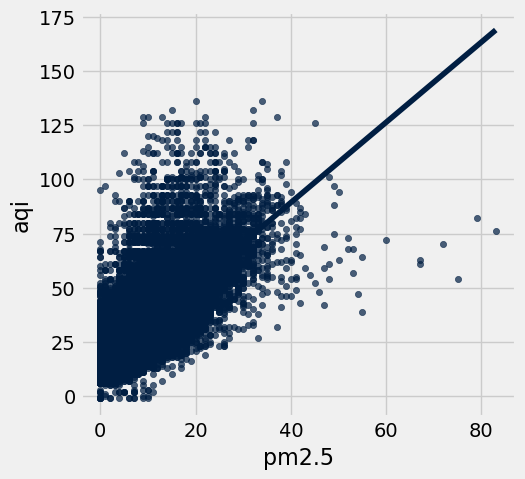

In [12]:
# As usual, let's investigate our data visually before analyzing it numerically. 
# Just run this cell to plot the relationship between the 2 attribute/columns.
# The scatter plot should look similar to the one you plotted for 1.4. 
my_data.scatter(0, 1, fit_line=True)

In [13]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2:**

Use the functions given to assign the correlation between the 2 attributes to the variable `cor`.

The function `correlation` takes in three arguments, a table `tbl` and the labels of the columns you are finding the correlation between, `col1` and `col2`.


In [14]:
def standard_units(arr):
    return (arr- np.mean(arr)) / np.std(arr)

def correlation(tbl, col1, col2):
    r = np.mean(standard_units(tbl.column(col1)) * standard_units(tbl.column(col2)))
    return r

cor = correlation(my_data, "pm2.5", "aqi")
cor


0.74944382208424221

In [15]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Can you see a correlation between the 2 variables? If in this sample, we found a linear relation between the two variables, would the same be true for the population? Would it be exactly the same linear relation? Could we predict the response of a new individual who is not in our sample?

**Question 2.3: Writing Hypotheses.**

Suppose you think the slope of the true line of best fit for the 2 variables is not zero: that is, there is some correlation/association between them. To test this claim, we can run a hypothesis test! Define the null and alternative hypothesis for this test.


The null hypothesis is that the slope of the true line of best fit between "pm2.5" and "aqi" is  0. This means there is no linear relationship between the two variables. The alternative hypothesis is that the slope of the true line of best fit between "pm2.5" and "aqi" is not 0. This means there is a linear relationship between the two variables.

<!-- END QUESTION -->

**Question 2.4:**

Maria says that instead of finding the slope for each resample, we can find the correlation instead, and that we will get the same result. Why is she correct? What is the relationship between slope and correlation?


The slope of the regression line and the correlation coefficient are closely related. The correlation coefficient measures the strength and direction of the linear relationship between two variables while the slope quantifies the rate of change between the variables. Maria is correct because both correlation and slope represent the linear relationship between the two variables. Using resampling with correlation captures the same info about the connection between them without having to calculate the slope directly.

<!-- END QUESTION -->

**Question 2.5:** Define the function `one_resample_r` that performs a bootstrap and finds the correlation between the 2 variables in the resample. `one_resample_r` should take three arguments, a table `tbl` and the labels of the columns you are finding the correlation between, `col1` and `col2`.



In [16]:
def one_resample_r(tbl, col1, col2):
    resample = tbl.sample(with_replacement=True)
    resample_r = correlation(resample, col1, col2)
    return resample_r


# Uncomment the line of code below and change `Column 1` and `Column 2` to match your dataset.

one_resample = one_resample_r(my_data, "pm2.5", "aqi")
one_resample

0.74990780887038422

In [17]:
grader.check("q2_5")

q2_5 results: All test cases passed!

**Question 2.6:**
Generate 1000 bootstrapped correlations for the 2 variables, store your results in the array `resampled_correlations`, and plot a histogram of your results.


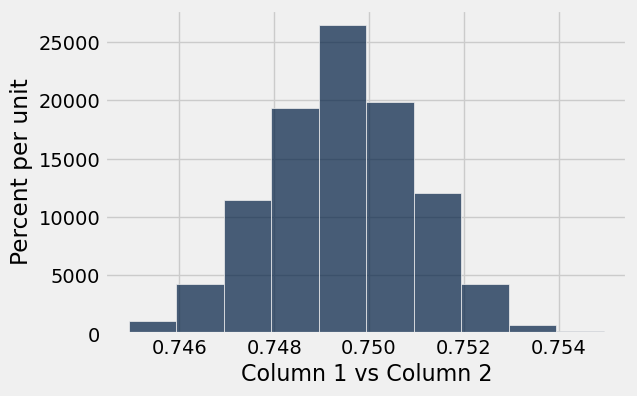

In [18]:
resampled_correlations = make_array()
num_repetitions = 1000

for i in range(num_repetitions):
    resample_r = one_resample_r(my_data, "pm2.5", "aqi")
    resampled_correlations = np.append(resampled_correlations, resample_r)
   
    
# Uncomment the line of code below and change column names to match your dataset
Table().with_column("Column 1 vs Column 2", resampled_correlations).hist()

In [19]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 2.7:** Calculate a 95% confidence interval for the resampled correlations and assign either `True` or `False` to `reject` if we can reject the null hypothesis or if we cannot reject the null hypothesis using a 5% p-value cutoff.


In [20]:
lower_bound = np.percentile(resampled_correlations, 2.5)
upper_bound = np.percentile(resampled_correlations, 97.5)
reject = True


# Don't change this!
print(f"95% CI: [{lower_bound}, {upper_bound}] , Reject the null: {reject}")

95% CI: [0.7465475258004584, 0.7523496558341897] , Reject the null: True


## Analyzing Residuals

Next, we want to make a prediction for one variable (call this your y variable, or var2) based on the the other (call this your x variable, or var1). First, let's investigate how effective our predictions are.

**Question 2.8:**

Calculate the slope and intercept for the line of best fit for the 2 variables. Assign these values to `my_slope`, and `my_intercept`respectively. The function `parameters` returns a two-item array containing the slope and intercept of a linear regression line.

*Hint 1: Use the `parameters` function with the arguments specified!*

*Hint 2: Remember we're predicting the 2nd variable **based off** a first variable. That should tell you what the `colx` and `coly` arguments you should specify when calling `parameters`.*


In [21]:
# DON'T EDIT THE PARAMETERS FUNCTION
def parameters(tbl, colx, coly):
    x = tbl.column(colx)
    y = tbl.column(coly)
    
    r = correlation(tbl, colx, coly)
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_sd = np.std(x)
    y_sd = np.std(y)
    
    slope = (y_sd / x_sd) * r
    intercept = y_mean - (slope * x_mean)
    return make_array(slope, intercept)

# IS THIS CORRECT?
my_slope = parameters(my_data, "pm2.5", "aqi").item(0)
my_intercept = parameters(my_data, "pm2.5", "aqi").item(1)

**Question 2.9:**

Draw a scatter plot of the residuals with the line of best fit for the 2 variables.

*Hint: We want to get the predictions for every data point in the dataset*

*Hint 2: This question is really involved, try to follow the skeleton code!*


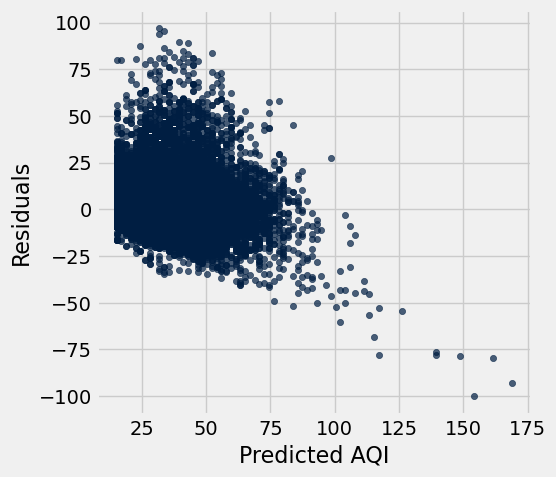

In [22]:
predicted_var2 = my_data.column("pm2.5") * my_slope + my_intercept
residuals_var2 = my_data.column("aqi") - predicted_var2


originalTable_with_residuals = my_data.with_columns( "Predicted AQI", predicted_var2, "Residuals", residuals_var2 )


# Now generate a scatter plot of the residuals!
# Uncomment the line of code below and change "Column 1" to match variable 1 used in your linear regression analysis
originalTable_with_residuals.scatter("Predicted AQI", "Residuals")



Here's a [link](https://www.inferentialthinking.com/chapters/15/6/Numerical_Diagnostics.html) to properties of residuals in the textbook that could help out with some questions.

**Question 2.10 :**

Based on the plot of residuals, do you think linear regression is a good model in this case? Explain.



Looking at the residuals plot linear regression might not be the best model in this case. The residuals show a clear pattern instead of being randomly scattered around zero which suggests that the relationship between the variables might not be entirely linear. This could mean that another model might better fit the data.

<!-- END QUESTION -->

#### Question 2.11

Is the correlation between the residuals and your predictor positive, zero, or negative?  Assign `residual_corr` to either 1, 2 or 3 corresponding to whether the correlation between the residuals and your predictor is positive, zero, or negative.  Hint: it is ok to check this with Python before answering!


1. Positive
2. Zero
3. Negative


In [23]:
residual_corr = 2


In [24]:
grader.check("q2_11")

q2_11 results: All test cases passed!

## Prediction Intervals

Now, Maria wants to predict the 2nd variable based on a chosen first variable x. 

**Question 2.12:** First, let's identify a value of your choice for x that you want to predict y with and explain in your own words why you chose that value. 

I choose x = 50 because it is near the center of the range of the predictor variable pm2.5 making it a reasonable and representative value for the prediction. Predictions near the mean of the predictor variable are generally more reliable.

<!-- END QUESTION -->

**Question 2.13:**

Define the function `one_resample_prediction` that generates a bootstrapped sample from the `tbl` argument, calculates the line of best fit for `ycol` vs `xcol` for that resample, and predicts a value based on `xvalue`. Then assign the value you chose for x in Question 2.12 to `chosen_var1`.

*Hint: Remember you defined the `parameters` function earlier*


In [25]:
def one_resample_prediction(tbl, colx, coly, xvalue):
    resample_tbl = tbl.sample(with_replacement=True)
    slope, intercept = parameters(resample_tbl, colx, coly)
    prediction = slope * xvalue + intercept
    return prediction

chosen_var1 = 50

maria_prediction = one_resample_prediction(my_data, "pm2.5", "aqi", chosen_var1)
maria_prediction

107.57316286073251

In [26]:
grader.check("q2_13")

q2_13 results: All test cases passed!

**Question 2.14:**

Assign `resampled_predictions` to be an array that will contain 1000 resampled predictions for the 2nd variable based on `chose_var1` that you picked, and then generate a histogram of it.


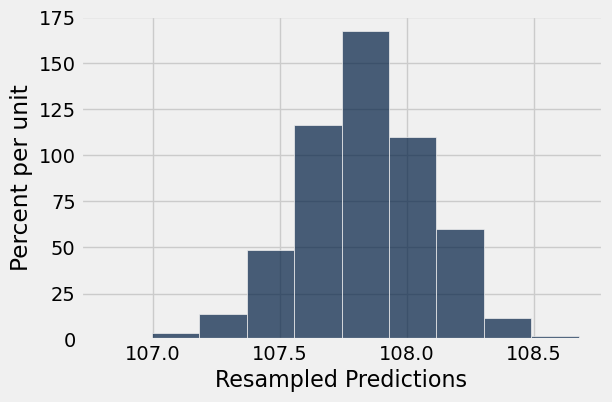

In [27]:
resampled_predictions = make_array()

for i in np.arange(1000):
    prediction = one_resample_prediction(my_data, "pm2.5", "aqi", chosen_var1)
    resampled_predictions = np.append(resampled_predictions, prediction)

# Don't change/delete the code below in this cell, just run to visualize the distribution
Table().with_column("Resampled Predictions", resampled_predictions).hist()

**Question 2.15:**

Using `resampled_predictions` from Question 2.14, generate a 99% confidence interval for Maria's prediction.


In [28]:
lower_bound_maria = np.percentile(resampled_predictions, 0.5)
upper_bound_maria = np.percentile(resampled_predictions, 99.5)

# Don't delete/modify the code below in this cell
print(f"99% CI: [{lower_bound_maria}, {upper_bound_maria}]")

99% CI: [107.12147187889288, 108.45477555076562]


In [29]:
grader.check("q2_15")

q2_15 results:
    q2_15 - 1 result:
        ❌ Test case failed
        Trying:
            all([type(lower_bound_maria) in set([float, np.float32, np.float64]), 
        Expecting nothing
        **********************************************************************
        Line 1, in q2_15 0
        Failed example:
            all([type(lower_bound_maria) in set([float, np.float32, np.float64]), 
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_15 0[0]>", line 1
                all([type(lower_bound_maria) in set([float, np.float32, np.float64]), 
                    ^
            SyntaxError: '[' was never closed
        Trying:
            type(upper_bound_maria) in set([float, np.float32, np.float64])])
        Expecting:
            True
        **********************************************************************
        Line 2, in q2_15 0
        Failed example:
            type(upper_bound_maria) in set([float, np.float32, np.float64])])
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_15 0[1]>", line 1
                type(upper_bound_maria) in set([float, np.float32, np.float64])])
                                                                               ^
            SyntaxError: unmatched ']'

**Question 2.16:** Uncomment and change the 2 lines of code underneath the TODOs, with the correct `Column 1` and `Column 2`. Then run the following cell to see a few bootstrapped regression lines, and the predictions they make for your chosen value for `chosen_var1` (picked in question 2.13)

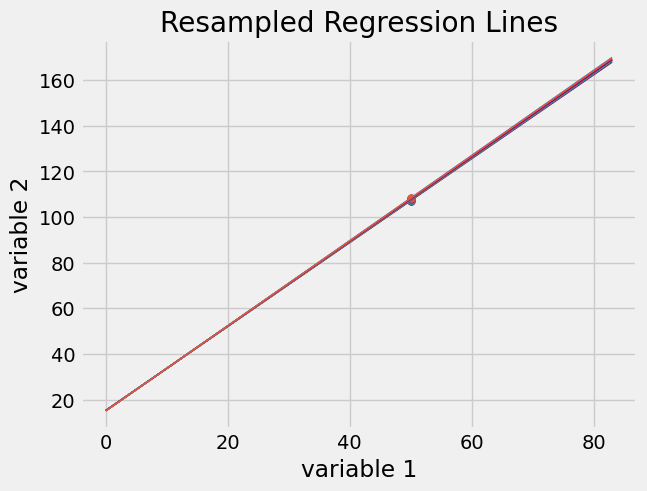

In [30]:
# You don't need to understand all of what it is doing but you should recognize a lot of the code!
lines = Table(['slope','intercept'])

x=chosen_var1 # This is the value you picked in question 2.14

for i in np.arange(20):
    resamp = originalTable_with_residuals.sample(with_replacement=True)
    # TODO: change Column 1 and Column 2 in the line below and uncomment
    resample_pars = parameters(resamp, "pm2.5", "aqi") 
    slope = resample_pars.item(0)
    intercept = resample_pars.item(1)
    lines.append([slope, intercept])
    
lines['prediction at x='+str(x)] = lines.column('slope')*x + lines.column('intercept')
# TODO: change Column 1 in the line below and uncomment
xlims = [min(originalTable_with_residuals.column("pm2.5")), max(originalTable_with_residuals.column("pm2.5"))]
left = xlims[0]*lines[0] + lines[1]
right = xlims[1]*lines[0] + lines[1]
fit_x = x*lines['slope'] + lines['intercept']
for i in range(20):
    plt.plot(xlims, np.array([left[i], right[i]]), lw=1)
    plt.scatter(x, fit_x[i], s=30)
plt.ylabel("variable 2"); # You can change the label here to be more descriptive
plt.xlabel("variable 1"); # You can change the label here to be more descriptive
plt.title("Resampled Regression Lines");

**Question 2.17**

What are some biases in this dataset that may have affected our analysis? Some questions you can ask yourself are: "is our sample a simple random sample?" or "what kind of data are we using/what variables are we dealing with: are they categorical, numerical, or both (both is something like ordinal data)?".

*Hint: you might want to revisit the beginning of this assignment to reread where your data came from and how the table was generated.*


One potential bias in this dataset is that it might not be a simple random sample. If the data was collected in a way that excludes certain groups or focuses on specific conditions this could skew the results. Since both variables are numerical there might also be a linear relationship assumption that does not account for other patterns or interactions in the data. The range of values for the variables might not cover all possibilities which could lead to overgeneralization when making predictions.

<!-- END QUESTION -->

# 3. Classification


**Recommended Reading**: 

* [Classification](https://www.inferentialthinking.com/chapters/17/Classification.html)

This part of the project is about k-Nearest Neighbors classification (kNN), and the purpose is to reinforce the basics of this method. You will be using the same dataset you picked in section one to complete this part.

We will try to classify our data in 2 classes/groups (labels) based on other variables (features) in our dataset. Go back to question 1.4 and review your answer and your visualization. If it helps copy the code for the visualization below.



## 3.1 Splitting the Dataset

**Question 3.1.** Let's begin implementing the k-Nearest Neighbors algorithm. Define the `distance` function, which takes in two arguments: an array of numerical features (`arr1`), and a different array of numerical features (`arr2`). The function should return the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between the two arrays. Euclidean distance is often referred to as the straight-line distance formula that you may have learned previously. 

In [28]:
def distance(arr1, arr2):
    return np.sqrt(np.sum((arr1 - arr2) ** 2))

# Don't change/delete the code below in this cell
distance_example = distance(make_array(1, 2, 3), make_array(4, 5, 6))
distance_example

5.196152422706632

In [29]:
grader.check("q3_1")

q3_1 results: All test cases passed!

### Splitting the Dataset
We'll do two different kinds of things with the dataset:

1. We'll build a classifier using the data for which we know the associated label; this will teach it to recognize labels of similar coordinate values. This process is known as *training*.
2. We'll evaluate or *test* the accuracy of the classifier we build on data we haven't seen before.

As discussed in [Section 17.2](https://inferentialthinking.com/chapters/17/2/Training_and_Testing.html#training-and-testing), we want to use separate datasets for training and testing. As such, we split up our one dataset into two.

**Question 3.2.** Next, let's split our dataset into a training set and a test set. We will start with the full dataset `my_data_raw` (not the one with just the columns used for regression). The table should contain the variable that will be used in classification, it should look like the table after question 1.3.

Now, let's create a training set with the first 75% of the dataset and a test set with the remaining 25% (e.g. if your dataset has 100 rows, 75 rows will be the training set, 25 rows will be the test set). Remember that assignment to each group should be random, so we should shuffle the table first.

*Hint: as a first step we can **shuffle** all the rows, then use the* `tbl.take` *function to split up the rows for each table*


In [30]:
# Data is too big and taking too much memory 
my_data_short = my_data_raw.sample( 2000, with_replacement = False)


In [31]:
shuffled_table = my_data_short.sample(with_replacement=False)
train_size = round(0.75 * my_data_short.num_rows)
train = shuffled_table.take(np.arange(train_size))
test = shuffled_table.take(np.arange(train_size, my_data_short.num_rows))

print("Training set:\t",   train.num_rows, "examples")
print("Test set:\t",       test.num_rows, "examples")
train.show(5), test.show(5);

Training set:	 1500 examples
Test set:	 500 examples


date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
2024-06-22 08:00,Meinong,Kaohsiung City,12,nan,Good,0.1,0.1,13.3,10,8,1,1.8,3.2,1.4,1.1,167,nan,0.1,2.1,12,0,120.531,22.8836,47
2024-08-25 14:00,Shalu,Taichung City,41,nan,Good,4.4,0.28,55.3,40.9,26,19,6.8,8.1,1.2,2.4,263,nan,0.2,12.7,22,1,120.569,24.2256,29
2024-08-23 02:00,Pingzhen,Taoyuan City,28,nan,Good,1.7,0.27,0.7,7,18,6,17.9,22,4.1,0.9,258,nan,0.1,6,19,1,121.204,24.9528,20
2024-06-20 11:00,Fuxing,Kaohsiung City,13,nan,Good,0.5,0.18,14.1,5.9,10,2,5.7,9.2,3.5,2,307,nan,0.2,4.1,10,0,120.312,22.6087,71
2024-08-07 09:00,Hukou,Hsinchu County,61,PM2.5,Moderate,1.1,0.28,25.8,12.5,30,21,9.8,13.2,3.3,1.7,262,nan,0.2,19.4,26,1,121.039,24.9001,22


date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
2024-07-25 16:00,Puzi,Chiayi County,30,nan,Good,0,0.12,36.2,32.5,15,4,2.2,2.9,0.7,2.7,186,nan,0.1,7.7,24,0,120.248,23.4654,40
2024-07-20 03:00,Guanyin,Taoyuan City,32,nan,Good,1.3,0.08,13.2,22,24,9,8.7,8.9,0.2,1,81,nan,0,9.9,18,2,121.083,25.0356,19
2024-07-03 02:00,Meinong,Kaohsiung City,10,nan,Good,0.3,0.11,4.8,11.8,14,0,2.9,3.6,0.6,0.2,82,nan,0.1,2.2,10,0,120.531,22.8836,47
2024-08-18 18:00,Zhongming,Taichung City,32,nan,Good,1.7,0.25,26.5,35.4,10,9,5,6.7,1.7,1,197,nan,0.2,9.1,12,1,120.641,24.152,31
2024-07-14 06:00,Xinying,Tainan City,24,nan,Good,1,0.19,7.7,14,19,7,5.2,7,1.8,1,32,nan,0.1,7.3,17,1,120.317,23.3056,43


In [32]:
grader.check("q3_2")

q3_2 results:
    q3_2 - 1 result:
        ❌ Test case failed
        Trying:
            train.num_rows == round(75* my_data_raw.num_rows/100,0)
        Expecting:
            True
        **********************************************************************
        Line 2, in q3_2 0
        Failed example:
            train.num_rows == round(75* my_data_raw.num_rows/100,0)
        Expected:
            True
        Got:
            False

    q3_2 - 2 result:
        ❌ Test case failed
        Trying:
            test.num_rows == round(25* my_data_raw.num_rows/100,0)
        Expecting:
            True
        **********************************************************************
        Line 2, in q3_2 1
        Failed example:
            test.num_rows == round(25* my_data_raw.num_rows/100,0)
        Expected:
            True
        Got:
            False

    q3_2 - 3 result:
        ❌ Test case failed
        Trying:
            train.num_rows + test.num_rows == my_data_raw.num_rows
        Expecting:
            True
        **********************************************************************
        Line 1, in q3_2 2
        Failed example:
            train.num_rows + test.num_rows == my_data_raw.num_rows
        Expected:
            True
        Got:
            False

## 3.2 K-Nearest Neighbors

K-Nearest Neighbors (k-NN) is a classification algorithm.  Given some numerical *attributes* (also called *features*) of an unseen example, it decides whether that example belongs to one or the other of two categories based on its similarity to previously seen examples. Predicting the category of an example is called *labeling*, and the predicted category is also called a *label*.


**Question 3.3.** Assign `chosen_features` to an array of column names (strings) of the features (column labels) from the dataset. 

*Hint: Which of the column names in the table are the features, and which of the column names correspond to the class we're trying to predict?*

*Hint: No need to modify any tables, just manually create an array of the feature names!*

In [33]:
chosen_features = make_array("pm2.5", "pm10", "so2")
chosen_features

array(['pm2.5', 'pm10', 'so2'],
      dtype='<U5')

**Question 3.4.** Now define the `classify` function. This function should take in a `test_row` from a table like `test` and classify in using the k-Nearest Neighbors based on the correct `features` and the data in `train`. A refresher on k-Nearest Neighbors can be found [here](https://www.inferentialthinking.com/chapters/17/4/Implementing_the_Classifier.html).


*Hint 1:* The `distance` function we defined earlier takes in arrays as input, so use the `row_to_array` function we defined for you to convert rows to arrays of features.

*Hint 2:* The skeleton code we provided iterates through each row in the training set.

In [34]:
def row_to_array(row, features):
    """Converts a row to an array of its features."""
    arr = make_array()
    for feature in features:
        arr = np.append(arr, row.item(feature))
    return arr

def classify(test_row, k, train, features):
    test_row_features_array = row_to_array(test_row, features)
    
    distances = make_array()
    
    for train_row in train.rows:
        train_row_features_array = row_to_array(train_row, features)
        row_distance = distance(test_row_features_array, train_row_features_array)
        distances = np.append(distances, row_distance)
    train_with_distances = train.with_column("Distance", distances)
    nearest_neighbors = train_with_distances.sort("Distance").take(np.arange(k))
    most_common_label = nearest_neighbors.group("status").sort("count", descending=True).column("status").item(0)
    return most_common_label

# Don't modify/delete the code below
first_test = classify(test.row(0), 5, train, chosen_features)
first_test

'Good'

### Evaluating your classifier

Now that we have a way to use this classifier, let's focus on the 3 Nearest Neighbors and see how accurate it is on the whole test set.

**Question 3.5.** Define the function `three_classify` that takes a `row` from `test` as an argument and classifies the row based on using 3-Nearest Neighbors. Use this function to find the `accuracy` of a 3-NN classifier on the `test` set. `accuracy` should be a proportion (not a percentage) of the test data that were correctly predicted.


*Hint: You should be using a function you just created!*

*Note: Usually before using a classifier on a test set, we'd classify first on a "validation" set, which we then can modify our training set again if need be, before actually testing on the test set. You don’t need to do that for this question, but please keep this in mind for future courses.*


In [35]:
def three_classify(row):
    return classify(row, 3, train, chosen_features)

test_with_prediction = test.with_column( "Predicted Status", test.apply(three_classify) )
labels_correct =  test_with_prediction.column("Predicted Status") == test_with_prediction.column("status")
accuracy = np.count_nonzero(labels_correct) / test.num_rows
accuracy

0.93

**Question 3.6.** An important part of evaluating your classifiers is figuring out where they make mistakes. Assign the name `test_correctness` to the test_with_prediction table with an additional column `'Was correct'`. The last column should contain `True` or `False` depending on whether or not our classifier classified correctly.
*Note:* You can either include all of the columns from the test_with_prediction table or just the columns representing the features used by the classifier.

In [36]:
# Feel free to use multiple lines of code
# but make sure to assign test_correctness to the proper table!
test_correctness = test_with_prediction.with_column( "Was correct", test_with_prediction.column("Predicted Status") == test_with_prediction.column("status") )
test_correctness.sort('Was correct', descending = False).show(15)

date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid,Predicted Status,Was correct
2024-06-23 08:00,Datong,Taipei City,46,nan,Good,0.7,0.78,5.4,3.5,39,18,13.4,43.7,30.2,-,-,nan,0.6,14.2,24,0,121.513,25.0633,16,Moderate,False
2024-08-23 20:00,Changhua (Yuanlin),Changhua County,53,PM2.5,Moderate,2,0.21,14.5,25.5,22,17,6.9,8.6,1.7,0.5,280,nan,0.1,16.4,22,1,120.564,23.9612,201,Good,False
2024-07-05 11:00,Changhua (Yuanlin),Changhua County,47,nan,Good,2.3,0.26,42.7,24.1,39,23,7.3,9.3,2,1.2,294,nan,0.1,14.6,25,1,120.564,23.9612,201,Moderate,False
2024-07-29 07:00,Shanhua,Tainan City,54,PM2.5,Moderate,0.8,0.17,10.7,10.2,21,15,5.5,6.5,1,2.5,4,nan,0.2,16.6,19,0,120.297,23.1134,44,Good,False
2024-08-31 01:00,Cailiao,New Taipei City,56,PM2.5,Moderate,0.9,0.27,29.3,30.6,21,9,9.5,10.3,0.8,1.4,112,nan,0.3,17.5,23,1,121.481,25.069,8,Good,False
2024-07-06 10:00,Fengyuan,Taichung City,33,nan,Good,1.3,0.29,52.1,17.1,31,21,6.7,8.3,1.6,1.1,330,nan,0.2,10.3,21,0,120.743,24.257,28,Moderate,False
2024-08-07 16:00,Xindian,New Taipei City,58,PM2.5,Moderate,1.3,0.17,44.4,49.6,32,18,7,8.6,1.6,1.9,273,nan,0.2,18.5,28,1,121.538,24.9772,4,Good,False
2024-08-26 09:00,Dacheng,Changhua County,43,nan,Good,1.1,0.07,30.2,26,34,19,3.4,5.4,1.9,1,334,nan,0,13.2,21,1,120.27,23.8549,85,Moderate,False
2024-06-14 08:00,Qianzhen,Kaohsiung City,35,nan,Good,1.5,0.6,12,10.1,24,13,11.5,24.8,13.2,1.7,191,nan,0.3,10.7,18,1,120.308,22.6045,57,Moderate,False
2024-08-26 19:00,Linyuan,Kaohsiung City,48,nan,Good,1.5,0.26,26,34.6,32,22,11.6,12.4,0.7,2,78,nan,0.1,14.7,22,0,120.412,22.4795,52,Moderate,False


**Question 3.7.** Do you see a pattern in the rows that your classifier misclassifies? In two sentences or less, describe any patterns you see in the results or any other interesting findings from the table above.

The classifier seems to misclassify rows where the "Predicted Status" is different from the actual "Status." There may be overlaps in the feature values ("pm2.5," "pm10," "so2," and others) for different statuses especially between "Good" and "Moderate" making it harder for the classifier to tell the difference between these categories.

<!-- END QUESTION -->

**Question 3.8.** Why do we divide our data into a training and test set? What is the point of a test set, and why do we only want to use the test set once? Explain your answer in 3 sentences or less. 

*Hint:* Check out this [section](https://inferentialthinking.com/chapters/17/5/Accuracy_of_the_Classifier.html) in the textbook.

We divide data into training and test sets to train the model on one part and evaluate its performance on another part. The test set shows how well the model works on unseen data making it a better measure of its accuracy. We only use the test set once to avoid overfitting and make sure that the evaluation is unbiased.

<!-- END QUESTION -->

**Question 3.9.** Why do we use an odd-numbered `k` in k-NN? Explain.

 We use an odd-numbered k in k-NN to avoid ties when finding the majority class among the nearest neighbors. With even numbers there is a chance of a tie which makes the classification unclear and less efficient. Odd numbers ensure that there is always a clear majority for accurate predictions.








<!-- END QUESTION -->

At this point, you've gone through one cycle of classifier design.  Let's summarize the steps:
1. From available data, select test and training sets.
2. Choose an algorithm you're going to use for classification.
3. Identify some features.
4. Define a classifier function using your features and the training set.
5. Evaluate its performance (the proportion of correct classifications) on the test set.

## 4. Explorations
Now that you know how to evaluate a classifier, it's time to build a better one.

**Question 4.1:**

Develop a classifier with better test-set accuracy than `three_classify`.  Your new function should have the same arguments as `three_classify` and return a classification.  Name it `another_classifier`. Then, check your accuracy using code from earlier.

You can use more or different features, or you can try different values of `k`. (Of course, you still have to use `train` as your training set!) 

**Make sure to create new variable names where needed, don't reassign any previously used variables here**, such as `accuracy` from the section 3.

In [ ]:
# Run this cell to remember what your accuracy was in the first attempt.

accuracy

In [28]:
# Feel free to add or change this array to improve your classifier
# Note that you can either use the original chosen_features or create a new list below

new_features = make_array("pm2.5", "pm10", "so2", "no", "co")

def another_classifier(row):
    return classify(row, 3, train, new_features)

new_test_with_prediction = test.with_column("Predicted Status", test.apply(another_classifier))
new_labels_correct = new_test_with_prediction.column("Predicted Status") == new_test_with_prediction.column("status")
new_accuracy = np.count_nonzero(new_labels_correct) / test.num_rows
new_accuracy

0.914

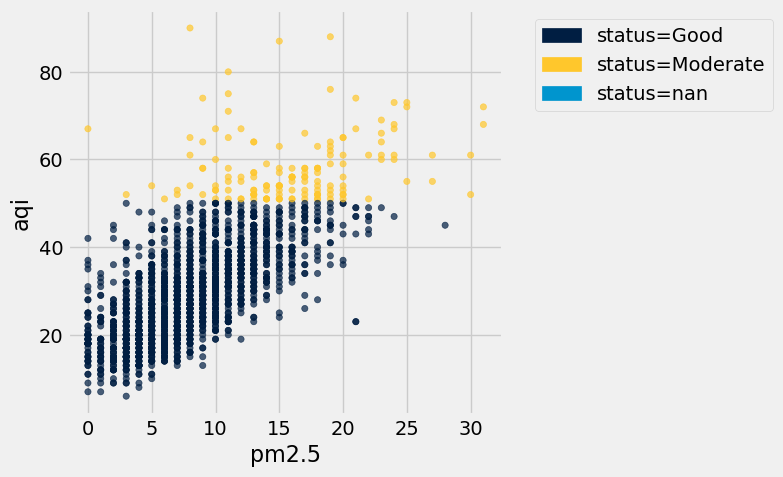

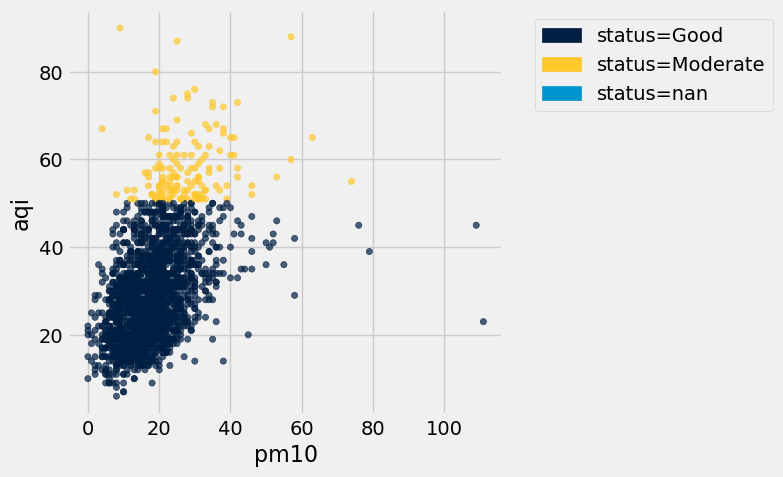

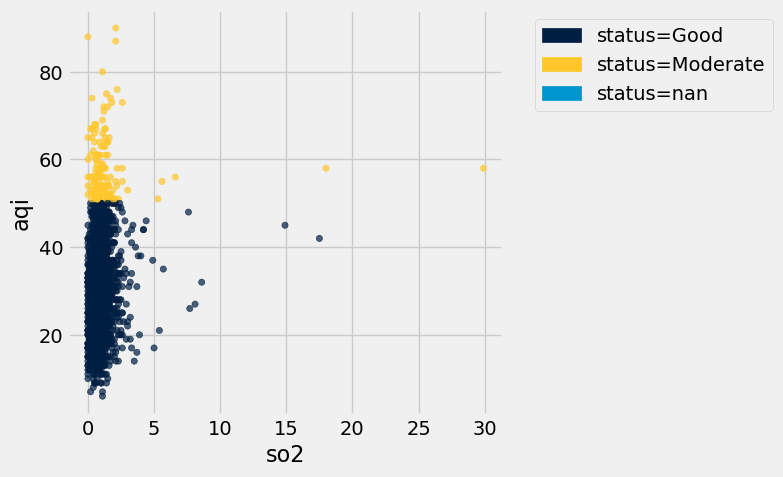

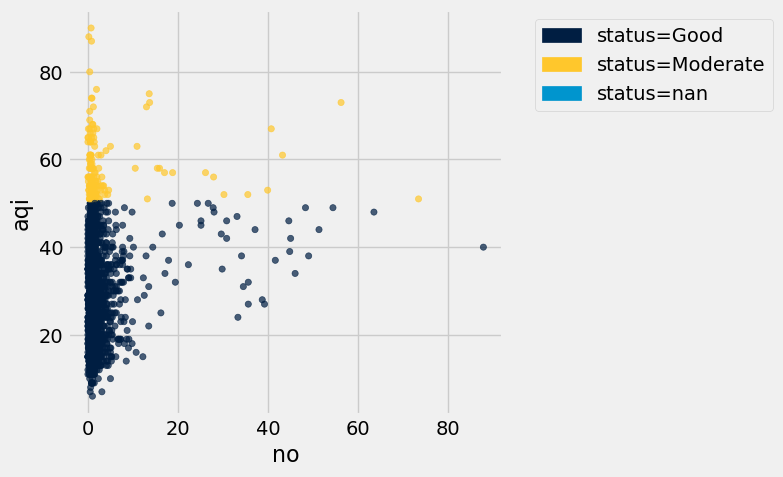

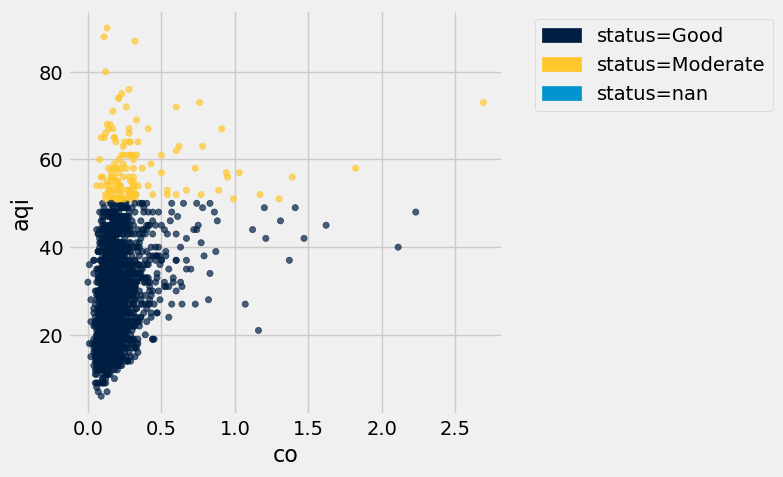

In [30]:
# Now that we looked at the accuracy, let's analyze correctness of your new classifier
# Use this coding cell to explore your data/ this cell will not be graded
# You are free to use as many lines of code as you would like
# you could look at a sorted table again just like in 3.6!

my_data_short.scatter("pm2.5", "aqi", group="status")
my_data_short.scatter("pm10", "aqi", group="status")
my_data_short.scatter("so2", "aqi", group="status")
my_data_short.scatter("no", "aqi", group="status")
my_data_short.scatter("co", "aqi", group="status")

**Question 4.2** 

Did your new classifier work better? Do you see a pattern in the mistakes your new classifier makes? What about in the improvement from your first classifier to the second one? Describe in two sentences or less.

**Hint:** You may not be able to see a pattern.

My new classifier did not work better because the accuracy dropped from 93 to 91.4. The mistakes in the new classifier could be from adding extra features like no and co which made it more complex and harder to classify correctly. My first classifier was simpler and worked better.

<!-- END QUESTION -->

**Question 4.3**

Briefly describe what you tried to improve your classifier. Any other ideas on how you could make a better classifier?

I  tried to improve my classifier by adding more features like no and co to see if they would help predict air quality status more accurately. To make a better classifier, I could experiment with different values of k or test more combinations of features to find the most relevant ones.

<!-- END QUESTION -->

**Question 4.4:**
Misclassification and errors in classifiers happens all the time and can really affect an individual. When applying machine learning and building classifiers, we all need to do our best to minimize misclassification and make sure we are transparent about the accuracies of what we built. Have you ever experienced something like this in real life before, where something was classified incorrectly? If not, can you think of an example where misclassification could really affect an individual? 

I have not experienced something like this directly but I can imagine how a medical diagnosis system misclassifying a patient's condition could have serious consequences. For example if someone is classified as healthy when they are not it could delay important treatment and affect their health.

<!-- END QUESTION -->

**Question 4.5:**
We hope you enjoyed the project! You made it to the concluding question. 

In a couple of sentences, share what you learned about your dataset while exploring its potential for prediction and classification.

I learned that my dataset has a lot of potential for predicting air quality but the accuracy depends on the features I choose and how the model is designed. It was interesting to see how small changes like adding more feature, can improve or make worse the classifiers performance.

<!-- END QUESTION -->

**Congratulations**: You're DONE with the final project notebook! Nice work. 
Time to submit.